### 1- Associations: Quantitative and Categorical Variables


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency

In [53]:
students_df = pd.read_csv("../learn_pandas/csv/students.csv")
students_df.head()

,school,address,absences,Mjob,Fjob,G3
0,GP,U,6,at_home,teacher,6
1,GP,U,4,at_home,other,6
2,GP,U,10,at_home,other,10
3,GP,U,2,health,services,15
4,GP,U,4,other,other,10


In [ ]:
# separate out scores for students who live in urban and rural locations:
students_urban = students_df.G3[students_df.address == "U"]
students_rural = students_df.G3[students_df.address == "R"]

#### Mean and Median Differences


In [ ]:
scores_urban_mean = np.mean(students_urban)  # 10.67
scores_rural_mean = np.mean(students_rural)  # 9.51

mean_diff = scores_urban_mean - scores_rural_mean
mean_diff  # output: 1.1629034646135619

In [ ]:
scores_urban_median = np.median(students_urban)
scores_rural_median = np.median(students_rural)

median_diff = scores_urban_median - scores_rural_median
median_diff  # output: 1.0

#### Side-by-Side Box Plots


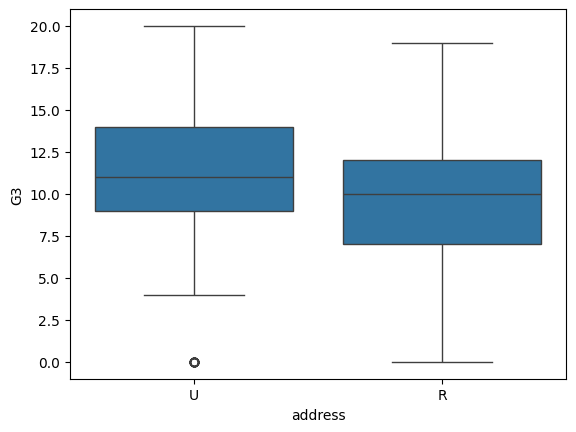

In [54]:
# Generate side-by-side boxplots for student scores (G3) by address.
sns.boxplot(data=students_df, x="address", y="G3")
plt.show()

#### Inspecting Overlapping Histograms


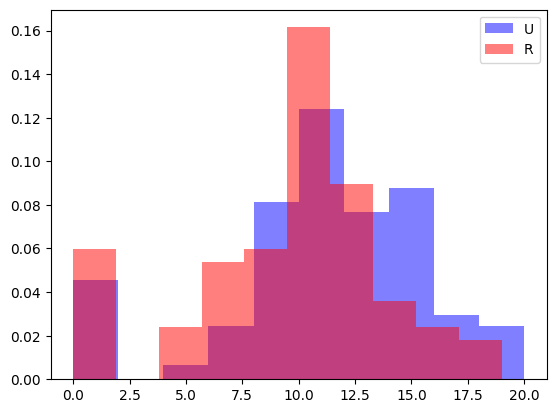

In [55]:
plt.hist(students_urban, color="blue", label="U", density=True, alpha=0.5)
plt.hist(students_rural, color="red", label="R", density=True, alpha=0.5)
plt.legend()
plt.show()

#### Exploring Non-Binary Categorical Variables


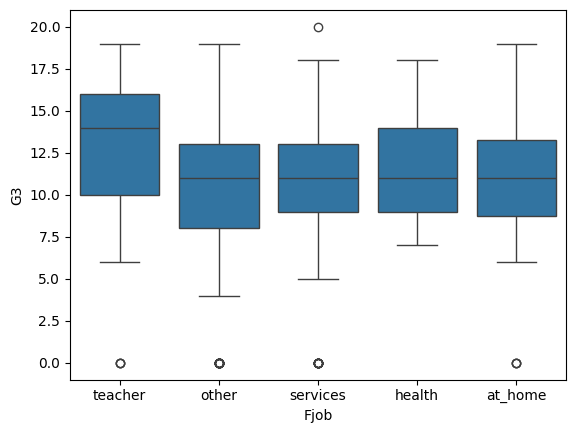

In [56]:
sns.boxplot(data=students_df, x="Fjob", y="G3")
plt.show()

### 2- Associations: Two Quantitative Variables


In [57]:
housing_df = pd.read_csv("../learn_pandas/csv/housing_sample.csv")
housing_df.head(10)

,price,type,sqfeet,beds,baths,lat,long
0,615,apartment,364,0,1.0,35.1653,-101.8840
1,1346,apartment,816,1,1.0,32.9865,-96.6860
2,900,apartment,500,1,1.0,30.2355,-97.7292
3,650,apartment,700,1,1.0,26.1923,-98.2657
4,1330,apartment,1040,2,2.0,30.6380,-96.2940
5,915,apartment,620,1,1.0,29.8754,-97.9404
6,1600,house,1578,3,2.0,32.6412,-97.1058
7,349,apartment,275,0,1.0,33.5865,-101.8610
8,695,house,650,1,1.0,31.5525,-97.1604
9,889,apartment,650,1,1.5,29.8754,-97.9404


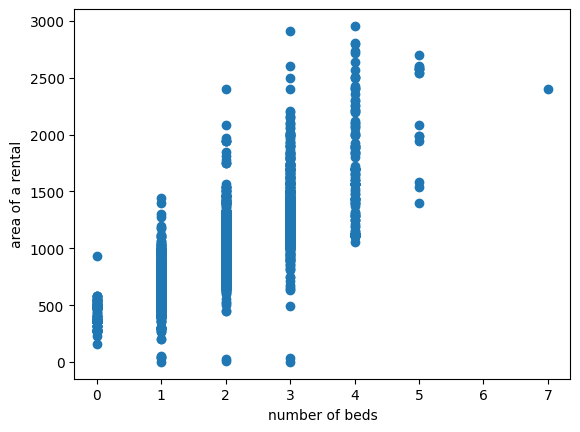

In [58]:
plt.scatter(x=housing_df.beds, y=housing_df.sqfeet)
plt.xlabel("number of beds")
plt.ylabel("area of a rental")
plt.show()

#### Exploring Covariance

Covariance can range from negative infinity to positive infinity. A positive covariance indicates that a larger value of one variable is associated with a larger value of the other. A negative covariance indicates a larger value of one variable is associated with a smaller value of the other. A covariance of 0 indicates no linear relationship.


In [ ]:
np.set_printoptions(suppress=True, precision=1)
cov_mat_sqfeet_beds = np.cov(housing_df.sqfeet, housing_df.beds)
cov_mat_sqfeet_beds

In [ ]:
cov_sqfeet_beds = 228.2
cov_sqfeet_beds

#### Correlation

Like covariance, Pearson Correlation (often referred to simply as “correlation”) is a scaled form of covariance. It also measures the strength of a linear relationship, but ranges from -1 to +1, making it more interpretable.

Generally, a correlation larger than about .3 indicates a linear association. A correlation greater than about .6 suggestions a strong linear association.


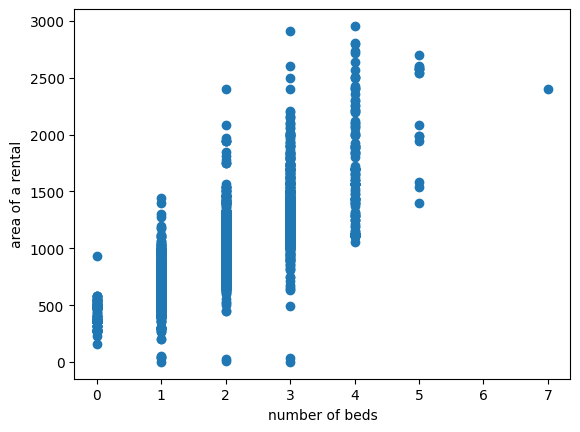

0.8060022524416044

In [59]:
corr_sqfeet_beds, p = pearsonr(housing_df.sqfeet, housing_df.beds)

plt.scatter(x=housing_df.beds, y=housing_df.sqfeet)
plt.xlabel("number of beds")
plt.ylabel("area of a rental")
plt.show()
corr_sqfeet_beds

It’s important to note that there are some limitations to using correlation or covariance as a way of assessing whether there is an association between two variables. Because correlation and covariance both measure the strength of linear relationships with non-zero slopes, but not other kinds of relationships, correlation can be misleading.


In [60]:
sleep_df = pd.read_csv("../learn_pandas/csv/sleep_performance.csv")
sleep_df.head()

,hours_sleep,performance
0,7.3,9.3
1,8.3,9.9
2,7.1,8.9
3,8.4,9.9
4,5.7,5.0


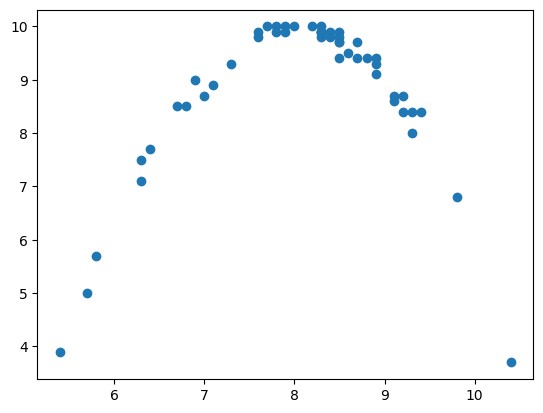

In [61]:
plt.scatter(x=sleep_df.hours_sleep, y=sleep_df.performance)
plt.show()

In [ ]:
corr_sleep_performance, p = pearsonr(sleep_df.hours_sleep, sleep_df.performance)
corr_sleep_performance  # output: 0.2814978189049413
# The correlation is only 0.28 (a relatively small correlation)

### 3- Associations: Two Categorical Variables


In [ ]:
# influence: yes = I have a natural talent for influencing people; no = I am not good at influencing people.
# blend_in: yes = I prefer to blend in with the crowd; no = I like to be the center of attention.
# special: yes = I think I am a special person; no = I am no better or worse than most people.
# leader: yes = I see myself as a good leader; no = I am not sure if I would make a good leader.
# authority: yes = I like to have authority over other people; no = I don’t mind following orders.

npi_df = pd.read_csv(
    "../learn_pandas/csv/npi_sample.csv"
)  # Narcissistic Personality Inventory
npi_df.head()

#### Contingency Tables: Frequencies


In [ ]:
special_authority_freq = pd.crosstab(npi_df.special, npi_df.authority)
special_authority_freq

#### Contingency Tables: Proportions


In [ ]:
special_authority_prop = special_authority_freq / len(npi_df)
special_authority_prop

#### Marginal Proportions


In [ ]:
authority_marginal = special_authority_prop.sum(axis=0)
authority_marginal

In [ ]:
special_marginal = special_authority_prop.sum(axis=1)
special_marginal

#### Expected Contingency Tables


In [ ]:
chi2, pval, dof, expected = chi2_contingency(special_authority_freq)
print("expected contingency table (no association):")
print(np.round(expected))

#### The Chi-Square Statistic

In [ ]:
chi2, pval, dof, expected = chi2_contingency(special_authority_freq)
chi2